Finding optimal boxes for yolo with using clustering on coco dataset objects

In [32]:
# anchors = anchor1_width, anchor1_height, anchor2_width, anchor2_height, ..., anchorN_width, anchorN_height

In [33]:
import collections
import json
import matplotlib.pyplot as plt
import numpy as np

Load data

In [34]:
train_path = "annotations_trainval2017/annotations/instances_val2017.json"
image_path = "val2017/"
with open(train_path,"r") as ftr:
    trlabel = json.load(ftr)
w = []
h = []

for annotation in trlabel["annotations"]:
    bbox = annotation["bbox"]
    w.append(bbox[2])
    h.append(bbox[3])

In [35]:
# process width and height to input data for kmeans clustering
w=np.asarray(w)
h=np.asarray(h)

x=[w,h]
x=np.asarray(x)
x=x.transpose()

In [40]:
from sklearn.cluster import KMeans
def clusterization(x, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)

    centers = kmeans.cluster_centers_
    return y_kmeans, centers

In [43]:
def draw_clusters(x, y, centers):
    plt.scatter(x[:, 0], x[:, 1], c=y, s=2, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
    plt.title("%s clusters" % len(centers))
    plt.show()

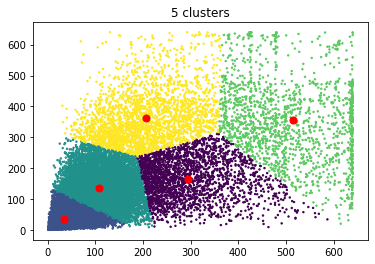

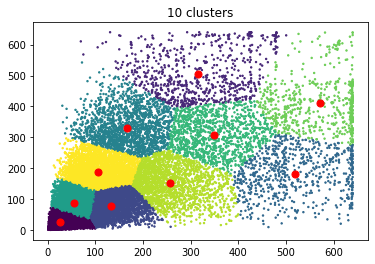

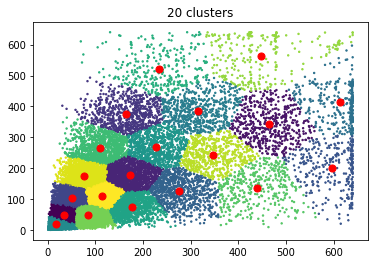

In [45]:
ground_truth_clusters = collections.namedtuple("Clusters", "clusters_5 cluster_10 cluster_20")
ground_truth_centers = collections.namedtuple("Centers", "centers_5 centers_10 centers_20")

clusters_cnts = [5, 10, 20]
for clusters_cnt in clusters_cnts:
    y, centers = clusterization(x, n_clusters=clusters_cnt)
    ground_truth_clusters.clusters_5 = y
    ground_truth_centers.centers_5 = centers
    draw_clusters(x, ground_truth_clusters.clusters_5, ground_truth_centers.centers_5)


Yolo prediction on "MS COCO 2017 Val images"